# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [5]:


# Carregar X_train
X_train = pd.read_csv("X_train_filtered.csv")

# Carregar y_train
y_train = pd.read_csv("y_train.csv").squeeze("columns")

# Carregar X_test
X_test = pd.read_csv("X_test_filtered.csv")

# Carregar y_test
y_test = pd.read_csv("y_test.csv").squeeze("columns")


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,         # 25 % para validação
    random_state=42,
    stratify=y_train,
)
print("\nTamanho das partições:")
print("  Treino:", X_tr.shape)
print("  Validação:", X_val.shape)


Tamanho das partições:
  Treino: (5514, 5)
  Validação: (1838, 5)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

 Importâncias das variáveis:
tBodyAcc-mean()-X    0.664136
tBodyAcc-mean()-Y    0.241343
tBodyAcc-mean()-Z    0.094521
Unnamed: 0           0.000000
subject              0.000000
dtype: float64


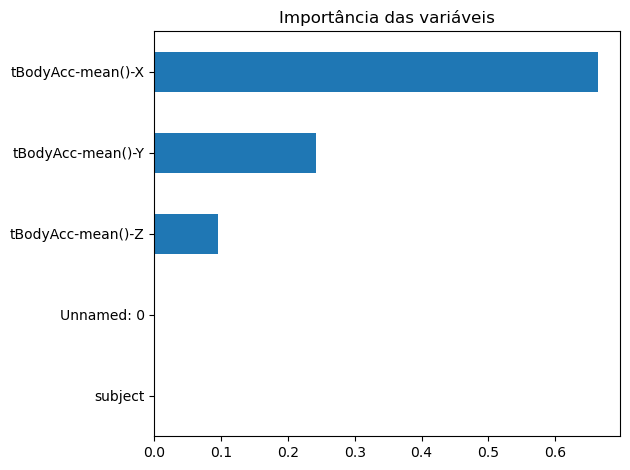

 Top 3 variáveis mais importantes: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']


In [8]:
# Treinar árvore com profundidade 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Importância das features
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

print(" Importâncias das variáveis:")
print(importances)

# Visualizar
importances.plot(kind='barh')
plt.title("Importância das variáveis")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Selecionar as 3 mais importantes
top3 = importances.head(3).index.tolist()
print(f" Top 3 variáveis mais importantes: {top3}")

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [12]:
%%time
top3 = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']  # ou substitua com seu top3 real

X_tr_top3 = X_tr[top3]
X_val_top3 = X_val[top3]
X_test_top3 = X_test[top3]  # Para avaliar depois

CPU times: total: 0 ns
Wall time: 4 ms


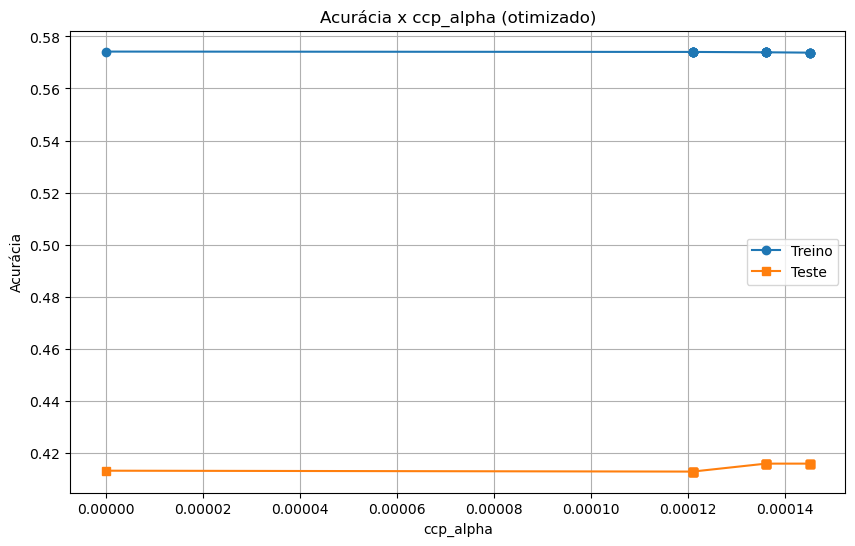

✅ Melhor ccp_alpha: 0.00013601741022850925
✅ Melhor acurácia no teste: 0.4160


In [16]:

# Usar slicing para reduzir a quantidade de alphas
ccp_alphas_reduzido = ccp_alphas[::5][:20]  # Pega no máximo 20 valores, espaçados de 5 em 5

modelos = []
acc_treino = []
acc_teste = []



for alpha in ccp_alphas_reduzido:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    modelos.append(clf)
    
    acc_treino.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_teste.append(accuracy_score(y_test, clf.predict(X_test)))

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas_reduzido, acc_treino, marker='o', label='Treino')
plt.plot(ccp_alphas_reduzido, acc_teste, marker='s', label='Teste')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia x ccp_alpha (otimizado)")
plt.legend()
plt.grid(True)
plt.show()

# Melhor modelo
melhor_indice = np.argmax(acc_teste)
melhor_alpha = ccp_alphas_reduzido[melhor_indice]
melhor_acc = acc_teste[melhor_indice]

print(f"✅ Melhor ccp_alpha: {melhor_alpha}")
print(f"✅ Melhor acurácia no teste: {melhor_acc:.4f}")




### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [24]:
# Reduz número de alphas testados para evitar travamentos
ccp_alphas_reduzido = ccp_alphas[::5][:20]

modelos = []
acc_teste = []

for alpha in ccp_alphas_reduzido:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    modelos.append(clf)
    acc_teste.append(accuracy_score(y_test, clf.predict(X_test)))

# Encontrar o melhor modelo com base na acurácia de teste
melhor_indice = np.argmax(acc_teste)
melhor_modelo = modelos[melhor_indice]

# Avaliação do melhor modelo na base de teste
final_model = melhor_modelo
y_pred = final_model.predict(X_test)

print(f"Acurácia do modelo na base de teste: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia do modelo na base de teste: 0.4160

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.35      0.45      0.39       496
           2       0.36      0.32      0.34       471
           3       0.42      0.29      0.34       420
           4       0.39      0.38      0.38       491
           5       0.47      0.52      0.49       532
           6       0.52      0.50      0.51       537

    accuracy                           0.42      2947
   macro avg       0.42      0.41      0.41      2947
weighted avg       0.42      0.42      0.41      2947


Matriz de Confusão:
[[224 101  37  24  59  51]
 [155 151  75  18  44  28]
 [132  89 121  18  37  23]
 [ 34  26  20 188 125  98]
 [ 40  27  19 121 276  49]
 [ 61  25  17 119  49 266]]
